In [58]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
from funcoes import *
from skimage.color import rgb2gray
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage as ndi

os.chdir('C:\\Users\\rthiago\\OneDrive\\IA Expert\\Segmentação\\Imagens') # para o notebook

# os.chdir('C:\\Users\\thi-m\\OneDrive\\Documentos\\Thiago\\IA_Expert\\Segmentação\\Imagens') # para o desktop

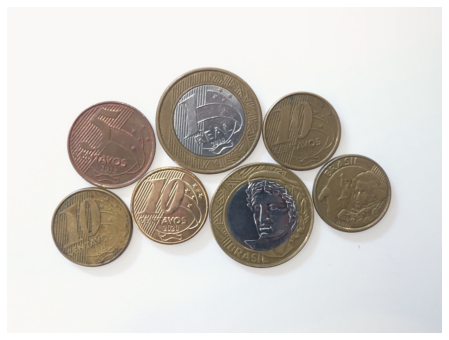

In [59]:
img = cv.imread('moedas03.jpg')
mostrar(img)

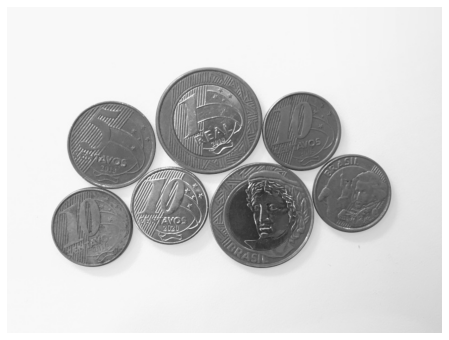

In [60]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
mostrar(gray)

174.0


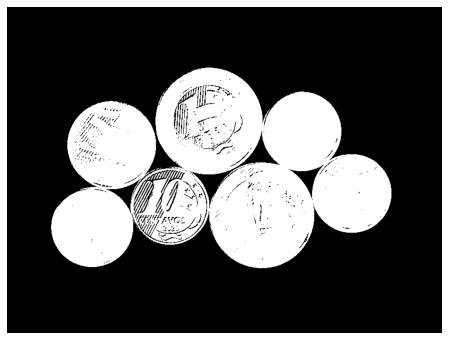

In [61]:
val, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
print(val)
mostrar(thresh)


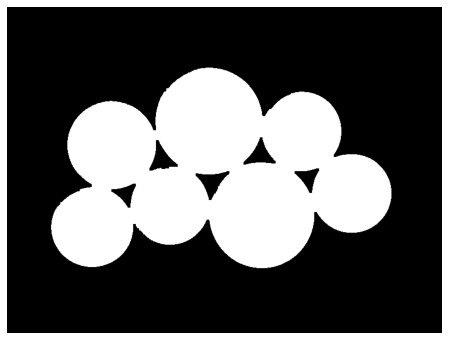

In [62]:
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, np.ones((3,3), np.uint8), iterations=2)
mostrar(closing)


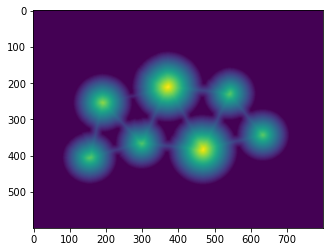

In [63]:
dist = ndi.distance_transform_edt(closing)
plt.imshow(dist)

In [64]:
local_max = peak_local_max(dist, indices=False, min_distance=20, labels=closing)


C:\Users\rthiago\AppData\Local\Temp\ipykernel_1660\1454715580.py:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices=False, min_distance=20, labels=closing)


In [65]:
markers = ndi.label(local_max, structure=np.ones((3,3)))[0]
np.unique(markers)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [66]:
labels = watershed(-dist, markers, mask=closing)

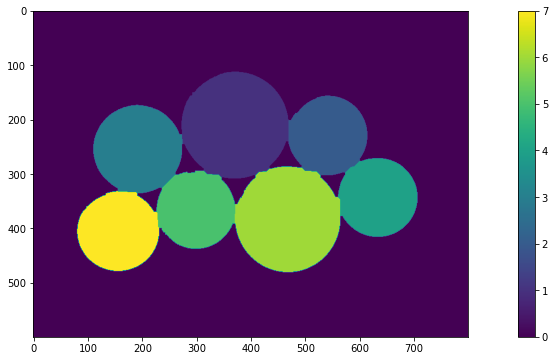

In [67]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plot = plt.imshow(labels)
plt.colorbar(plot);

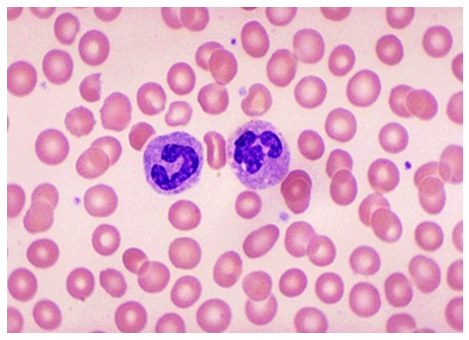

In [68]:
img = cv.imread('rbc.jpg')
mostrar(img)

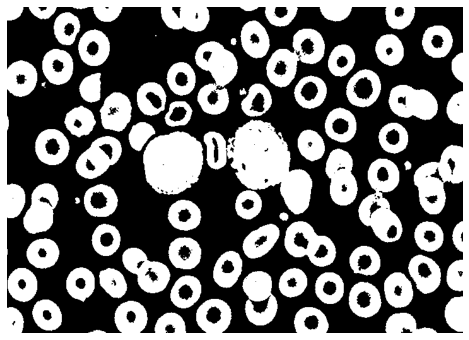

In [69]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
mostrar(thresh)

Aplicação de um filtro para reduzir os pontos pretos no interno das celulas

In [70]:
filtro = cv.pyrMeanShiftFiltering(img, 20, 40)
gray = cv.cvtColor(filtro, cv.COLOR_BGR2GRAY)
thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

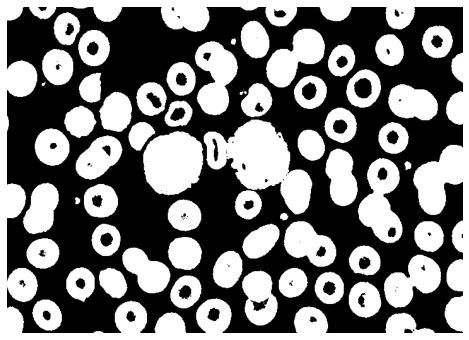

In [71]:
mostrar(thresh)

In [72]:
def preenche_buracos(img_thresh, limiar=1000):
    contornos, _ = cv.findContours(img_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) #cv.RETR_TREE: Retorna todos os contornos
    buracos = []
    for con in contornos:
        area = cv.contourArea(con)
        if area < limiar:
            buracos.append(con)
    
    cv.drawContours(img_thresh, buracos, -1, 255, -1)
    return img_thresh
    

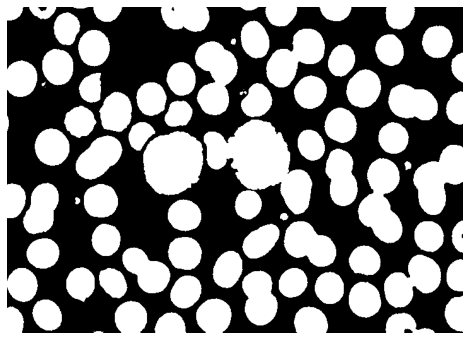

In [73]:
seg = preenche_buracos(thresh)
mostrar(seg)

C:\Users\rthiago\AppData\Local\Temp\ipykernel_1660\4133844062.py:3: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices=False, min_distance=20, labels=seg)


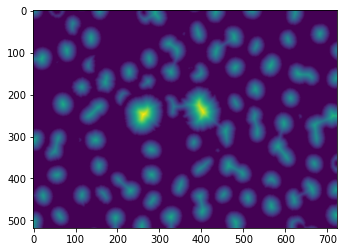

In [74]:
dist = ndi.distance_transform_edt(seg)
plt.imshow(dist);
local_max = peak_local_max(dist, indices=False, min_distance=20, labels=seg)

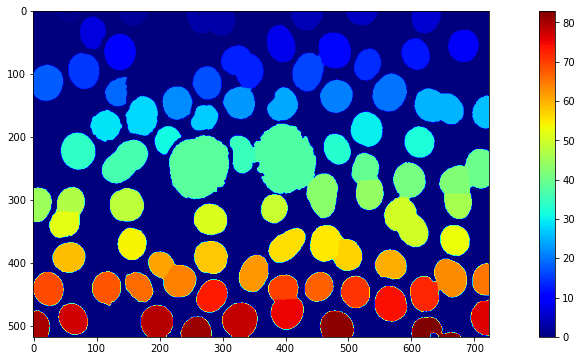

In [75]:
markers = ndi.label(local_max, structure=np.ones((3,3)))[0]
labels = watershed(-dist, markers, mask=seg)
fig = plt.gcf()
fig.set_size_inches(18,6)
plot = plt.imshow(labels, cmap='jet')
plt.colorbar(plot);

In [76]:
def segmentacao_watershed(img, preenchimento=1000):
    original = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    filtro = cv.pyrMeanShiftFiltering(img, 20, 40) #diminui o ruido da imagem
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

    if preenchimento > 0:
        thresh = preenche_buracos(thresh, preenchimento)
    
    dist = ndi.distance_transform_edt(thresh)
    local_max = peak_local_max(dist, indices=False, min_distance=20, labels=thresh)
    markers = ndi.label(local_max, structure=np.ones((3,3)))[0]
    labels = watershed(-dist, markers, mask=thresh)

    titulos = ['Imagem Original', 'Limiarização (objetos juntos)', 'Distance Transform', 'Watershed (objetos separados)']
    imagens = [original, thresh, dist, labels]

    fig = plt.gcf()
    fig.set_size_inches(16,12)
    for i in range(4):
        plt.subplot(2, 2, i+1)
        if i == 3:
            cmap='jet'
        else:
            cmap='gray'
        plt.imshow(imagens[i], cmap)
        plt.title(titulos[i])
        plt.xticks([]), plt.yticks([])
    plt.show()
    return labels
    

C:\Users\rthiago\AppData\Local\Temp\ipykernel_1660\407336266.py:11: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices=False, min_distance=20, labels=thresh)


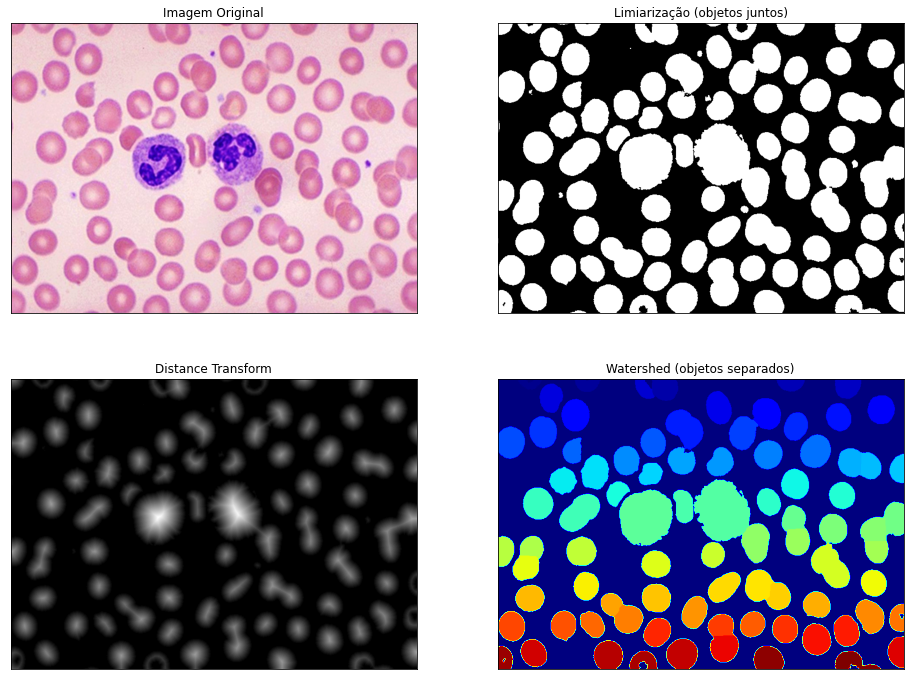

In [77]:
img = cv.imread('rbc.jpg')
segmentacao = segmentacao_watershed(img)

C:\Users\rthiago\AppData\Local\Temp\ipykernel_1660\407336266.py:11: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices=False, min_distance=20, labels=thresh)


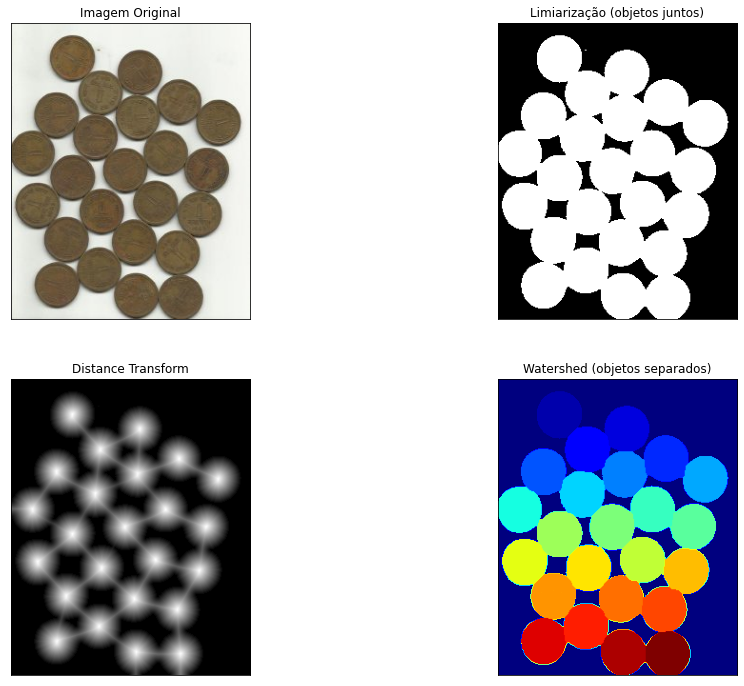

In [78]:
img = cv.imread('moedas04.jpg')
segmentacao = segmentacao_watershed(img, 0)

Sobreposição à imagem original

C:\Users\rthiago\AppData\Local\Temp\ipykernel_1660\407336266.py:11: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices=False, min_distance=20, labels=thresh)


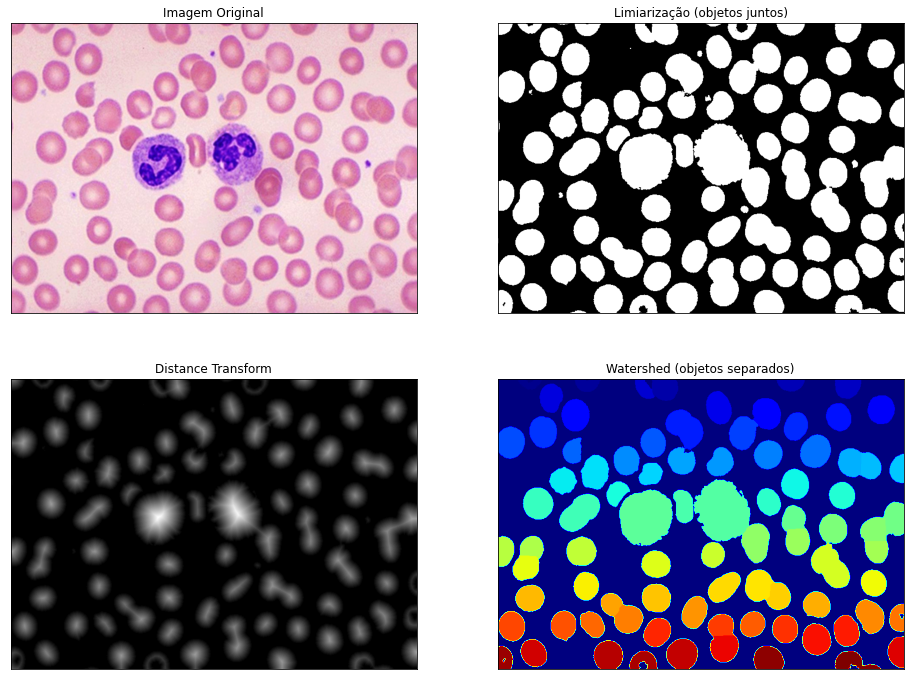

In [79]:
img = cv.imread('rbc.jpg')
labels = segmentacao_watershed(img) 
cmap = plt.cm.jet


In [80]:
norm = plt.Normalize(vmin=labels.min(), vmax=labels.max())
seg_watershed = cmap(norm(labels))


In [81]:
seg_watershed = ((seg_watershed*255).astype(np.uint8))
seg_watershed = cv.cvtColor(seg_watershed, cv.COLOR_RGB2BGR)


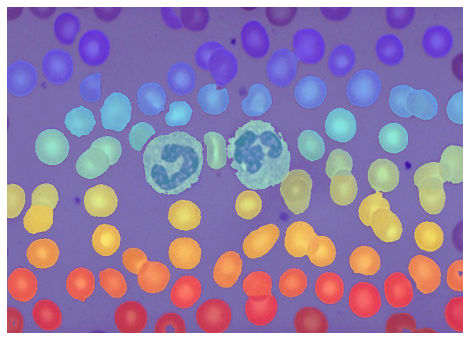

In [85]:
img_sobreposicao = cv.addWeighted(seg_watershed, 0.5, img, 0.5, 0)
mostrar(img_sobreposicao)

Numeração dos segmentos 

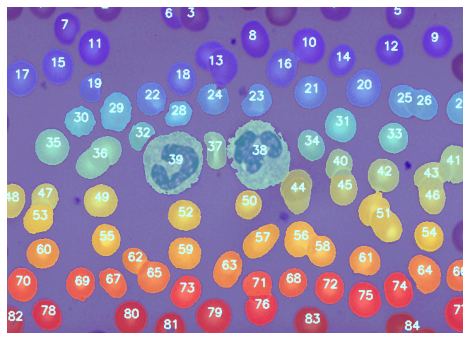

In [89]:
img_final = img_sobreposicao.copy()
for label in np.unique(labels):
    if label == 0:
        continue
    mascara = np.zeros(gray.shape, dtype='uint8')
    mascara[labels == label] = 255
    cnts = cv.findContours(mascara.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[-2]
    c = max(cnts, key=cv.contourArea)
    ((x,y), r) = cv.minEnclosingCircle(c)
    cv.putText(img_final, "{}".format(label), (int(x)-10, int(y)), cv.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,200), 2)

mostrar(img_final)